In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import numpy as np
from imageio.v2 import imread
from numpy.random import normal, uniform
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def frankes_function(x, y):
    z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
        + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
        + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
        - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
    return z

def create_feature_matrix(x, y, degree):
    # Stack x and y into a feature matrix
    X = np.vstack((x.ravel(), y.ravel())).T
    
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(X)
    
    return poly_features

def plot_3d(x, y, z, title):
    #Plot (code taken from project description)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.title(title)
    plt.show()

#Make data
n = 500
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05) + np.random.normal(0, 0.1, x.shape)

# x = np.linspace(-1, 3, n)
# y = np.linspace(-1, 3, n)

x, y = np.meshgrid(x, y)
z = frankes_function(x, y) #+ np.random.normal(0, 0.1, x.shape)

# #Test plot
# plot_3d(x, y, z, "Franke's Function Test Plot")

#Real data
#TODO: Smooth switch
# # Load the terrain - again from project description
# terrain = imread('SRTM_data_Norway_2.tif')

# N = 100
# m = 5 # polynomial order
# terrain = terrain[:N,:N]
# # Creates mesh of image pixels
# x = np.linspace(0,1, np.shape(terrain)[0])
# y = np.linspace(0,1, np.shape(terrain)[1])
# x, y = np.meshgrid(x,y)

# z = terrain



# a) Ordinary Least Squares on the Franke function
# b) Ridge and dependence on lambda
# c) Lasso
# e) Perform then a bias-variance analysis of the Franke function by studying the MSE value as function of the complexity of your model.

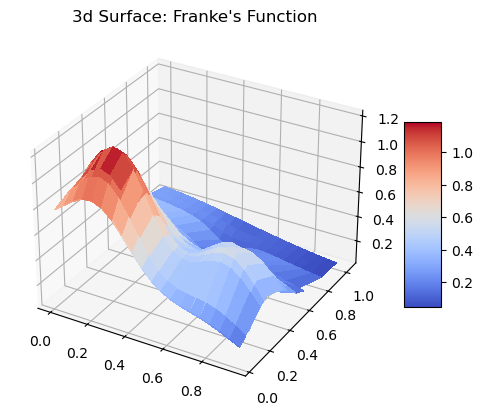

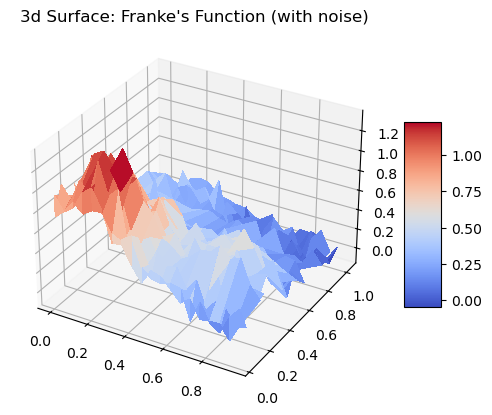

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from random import random, seed

def frankes_function(x, y):
    z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
        + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
        + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
        - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
    return z

# x = np.arange(0, 1, 0.05)
# y = np.arange(0, 1, 0.05) + np.random.normal(0, 0.1, x.shape)
# x, y = np.meshgrid(x, y)
# z = frankes_function(x, y) 

z_noise = frankes_function(x, y) + np.random.normal(0, 0.1, x.shape)

#Plot (code taken from project description)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3d Surface: Franke's Function")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z_noise, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3d Surface: Franke's Function (with noise)")
plt.show()

z max: 1.219129929243808
z min: 0.0050214094428496225
z mean: 0.45421148347175616
z shape: (20, 20)
z_scaled max: 1.3946732326191842
z_scaled min: -1.5888487036476986
z_scaled mean: 7.105427357601002e-17
z_scaled shape: (20, 20)


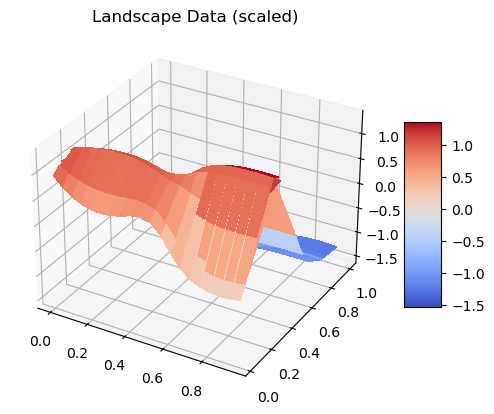

In [43]:
#Quick look at the data values
print(f"z max: {z.max()}")
print(f"z min: {z.min()}")
print(f"z mean: {z.mean()}")
print(f"z shape: {z.shape}")

scaler = StandardScaler()
z_scaled = scaler.fit_transform(z)

#plot_3d(x_scaled, y_scaled, z_scaled, "Franke's Function w/ mean centering")

#Plot (code taken from project description)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z_scaled, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Quick look at the data values
print(f"z_scaled max: {z_scaled.max()}")
print(f"z_scaled min: {z_scaled.min()}")
print(f"z_scaled mean: {z_scaled.mean()}")
print(f"z_scaled shape: {z_scaled.shape}")

#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Landscape Data (scaled)")
plt.show()

z = z_scaled.ravel() # Flatten z into a 1D array for regression (from ChatGPT)

In [49]:
def MSE(z_data, z_model):
    n = np.size(z_model)  # Number of data points
    return np.sum((z_data - z_model)**2)/n

# Ridge Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

[ 0.94417932 -0.47707319 -0.58756887]
Degree: 1
MSE (training): 0.038352254460076875
MSE (test): 0.030517200285873864
r2 (training): 0.5625312517616952
r2 (test): 0.5424780794272314

Degree: 2
MSE (training): 0.028657454475591232
MSE (test): 0.03420860585832608
r2 (training): 0.6503262718797993
r2 (test): 0.6311888683429514

Degree: 3
MSE (training): 0.01893379417043018
MSE (test): 0.0223232718251146
r2 (training): 0.7726354891308851
r2 (test): 0.7438321480487509

Degree: 4
MSE (training): 0.016288234684914433
MSE (test): 0.014300105237974134
r2 (training): 0.8079855002734188
r2 (test): 0.8236539661741872

Degree: 5
MSE (training): 0.013026497014324484
MSE (test): 0.012404571001262368
r2 (training): 0.8473075376443621
r2 (test): 0.8403897743348978



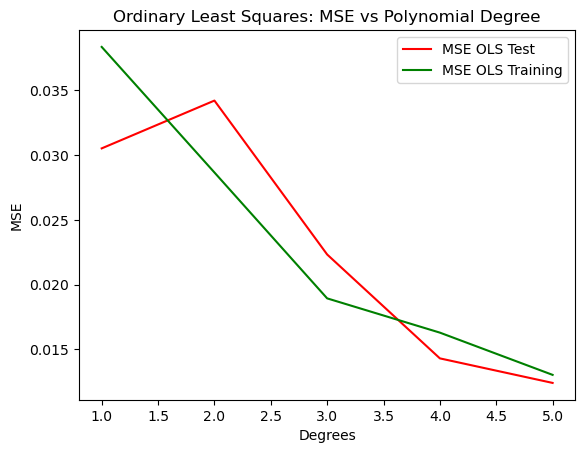

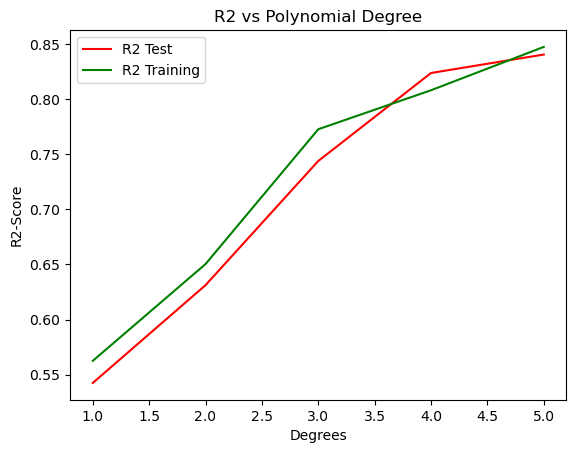

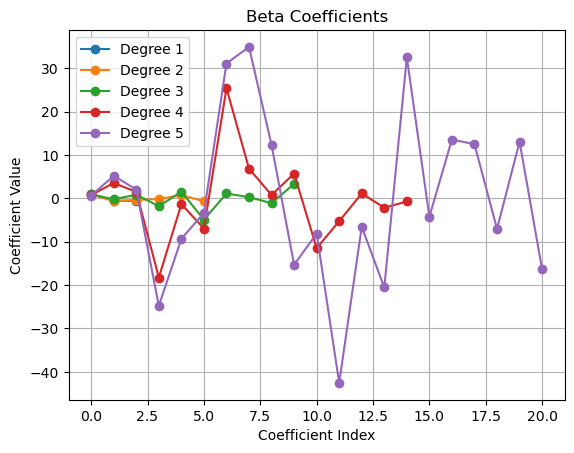

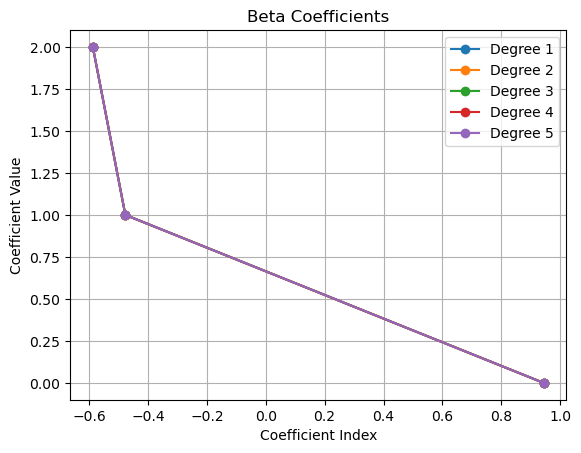

In [50]:
#Polynomials up to 5th order
def create_feature_matrix(x, y, degree):
    # Stack x and y into a feature matrix
    X = np.vstack((x.ravel(), y.ravel())).T
    
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(X)
    
    return poly_features

def MSE(z_data, z_model):
    n = np.size(z_model)  # Number of data points
    return np.sum((z_data - z_model)**2)/n


z = z_noise.ravel()
#z = z_scaled
train_MSEs = []
test_MSEs = []
train_r2s = []
test_r2s = []
betas = []

degrees = range(1,6)
for order in degrees:
    coefficients = []
    feature_matrix = create_feature_matrix(x, y, order)

    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

    #Matrix inversion
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices
    

    if order == 1:
        print(beta)
    for coeff in beta:
        coefficients.append(coeff)
    betas.append(coefficients)

    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    #OLS
    training_mse = MSE(z_train, z_tilde)
    test_mse = MSE(z_test, z_predict)

    train_MSEs.append(training_mse)
    test_MSEs.append(test_mse)

    print(f"Degree: {order}")
    print(f"MSE (training): {training_mse}")
    print(f"MSE (test): {test_mse}")

    #R2
    r2_training = error.r2_score(z_train, z_tilde)
    r2_test = error.r2_score(z_test, z_predict)
    print(f"r2 (training): {r2_training}")
    print(f"r2 (test): {r2_test}")
    print()

    train_r2s.append(r2_training)
    test_r2s.append(r2_test)

#Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, test_MSEs, 'r', label = 'MSE OLS Test')
plt.plot(degrees, train_MSEs, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Plot R2 vs. degrees
plt.figure()
plt.title("R2 vs Polynomial Degree")
plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
plt.plot(degrees, train_r2s, 'g', label = 'R2 Training')

plt.xlabel('Degrees')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')
    i += 1

# Adding plot details
plt.title('Beta Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
counter = 0
for degree in degrees:
    plt.plot(betas[counter], range(len(betas[counter])),  marker='o', label=f'Degree {degree}')
plt.title('Beta Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Ridge and Lasso Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

degree = 4
feature_matrix = create_feature_matrix(x, y, degree)
X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

training_ridge_mses = []
test_ridge_mses = []
training_ridge_r2s = []
test_ridge_r2s = []
betas_ridge = []

training_lasso_mses = []
test_lasso_mses = []
training_lasso_r2s = []
test_lasso_r2s = []

lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
nlambdas = 100
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]

    #Ridge
    beta_hat_ridge = Beta_ridge_regression(X_train, z_train, lmb)
    betas_ridge.append(beta_hat_ridge)
    z_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
    z_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

    train_mse = error.mean_squared_error(z_train, z_tilde_ridge)
    test_mse = error.mean_squared_error(z_test, z_predict_ridge)
    training_ridge_mses.append(train_mse)
    test_ridge_mses.append(test_mse)

    r2_train = error.r2_score(z_train, z_tilde_ridge)
    r2_test = error.r2_score(z_test, z_predict_ridge)
    training_ridge_r2s.append(r2_train)
    test_ridge_r2s.append(r2_test)

    #Lasso
    RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
    RegLasso.fit(X_train, z_train)
    y_tilde_lasso = RegLasso.predict(X_train)
    y_predict_lasso = RegLasso.predict(X_test)

    training_lasso_mses.append(error.mean_squared_error(z_train, y_tilde_lasso))
    test_lasso_mses.append(error.mean_squared_error(z_test, y_predict_lasso))

    training_lasso_r2s.append(error.r2_score(z_train, y_tilde_lasso))
    test_lasso_r2s.append(error.r2_score(z_test, y_predict_lasso))

# R2 Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'R2 Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'R2 Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.legend()
plt.show()

# MSE Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - MSE Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_mses, 'b--', label = 'MSE Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_mses, '--', color='orange', label = 'MSE Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10000, 100]

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.740e+02, tolerance: 8.007e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.672e+02, tolerance: 8.007e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.579e+02, to

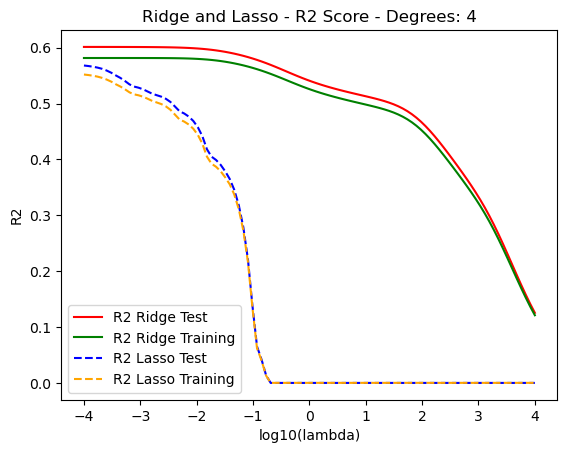

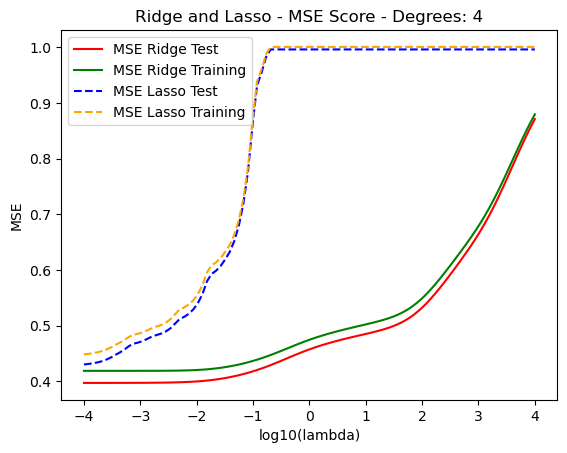

In [34]:
# Ridge and Lasso Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

degree = 4
feature_matrix = create_feature_matrix(x, y, degree)
X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

training_ridge_mses = []
test_ridge_mses = []
training_ridge_r2s = []
test_ridge_r2s = []
betas_ridge = []

training_lasso_mses = []
test_lasso_mses = []
training_lasso_r2s = []
test_lasso_r2s = []

lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
nlambdas = 100
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]

    #Ridge
    beta_hat_ridge = Beta_ridge_regression(X_train, z_train, lmb)
    betas_ridge.append(beta_hat_ridge)
    z_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
    z_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

    train_mse = error.mean_squared_error(z_train, z_tilde_ridge)
    test_mse = error.mean_squared_error(z_test, z_predict_ridge)
    training_ridge_mses.append(train_mse)
    test_ridge_mses.append(test_mse)

    r2_train = error.r2_score(z_train, z_tilde_ridge)
    r2_test = error.r2_score(z_test, z_predict_ridge)
    training_ridge_r2s.append(r2_train)
    test_ridge_r2s.append(r2_test)

    #Lasso
    RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
    RegLasso.fit(X_train, z_train)
    y_tilde_lasso = RegLasso.predict(X_train)
    y_predict_lasso = RegLasso.predict(X_test)

    training_lasso_mses.append(error.mean_squared_error(z_train, y_tilde_lasso))
    test_lasso_mses.append(error.mean_squared_error(z_test, y_predict_lasso))

    training_lasso_r2s.append(error.r2_score(z_train, y_tilde_lasso))
    test_lasso_r2s.append(error.r2_score(z_test, y_predict_lasso))

# R2 Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'R2 Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'R2 Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.legend()
plt.show()

# MSE Ridge/Lasso plots
plt.figure()
plt.title("Ridge and Lasso - MSE Score - Degrees: " + str(degree))

plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

plt.plot(np.log10(lambdas), test_lasso_mses, 'b--', label = 'MSE Lasso Test')
plt.plot(np.log10(lambdas), training_lasso_mses, '--', color='orange', label = 'MSE Lasso Training')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

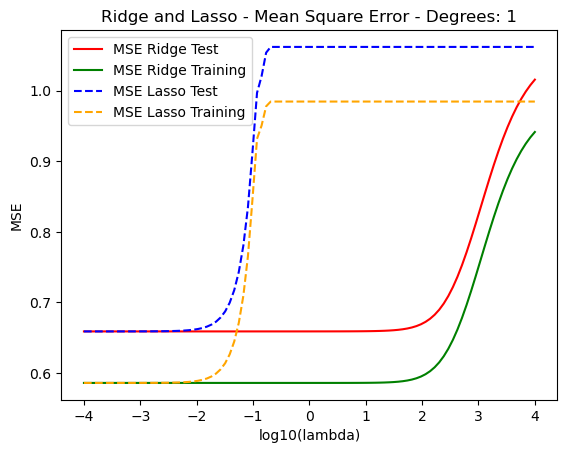

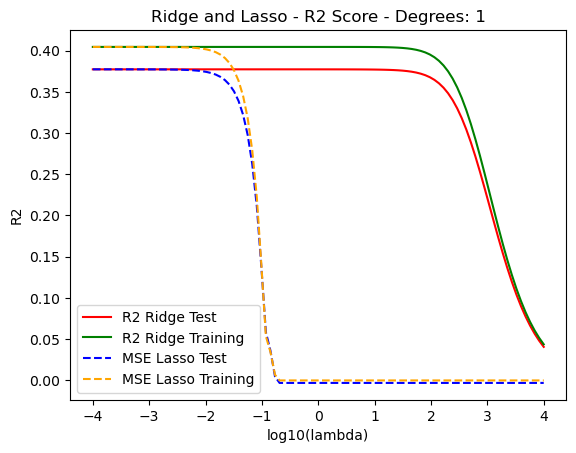

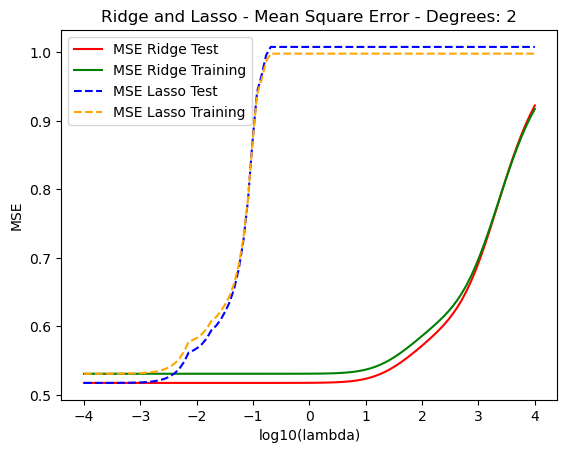

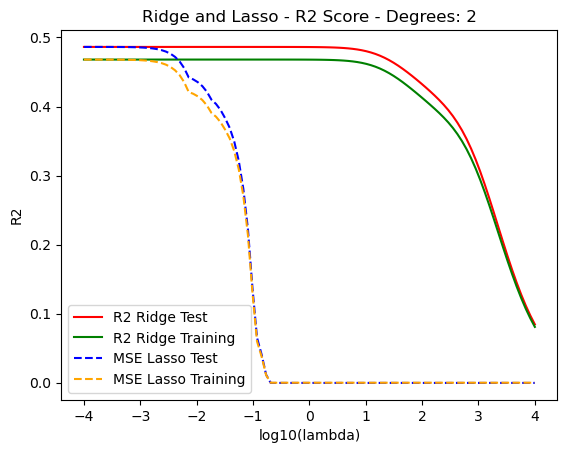

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+03, tolerance: 7.882e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+03, tolerance: 7.882e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+03, to

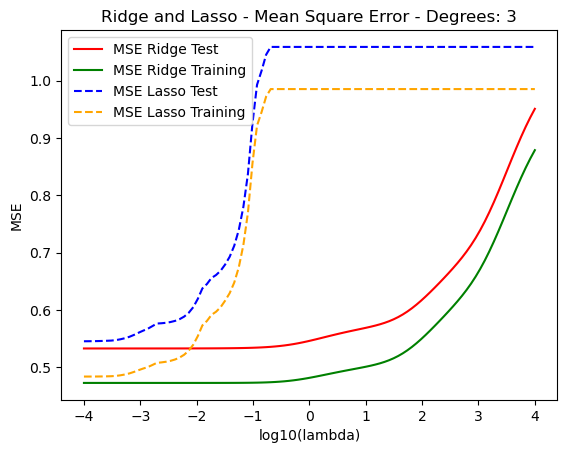

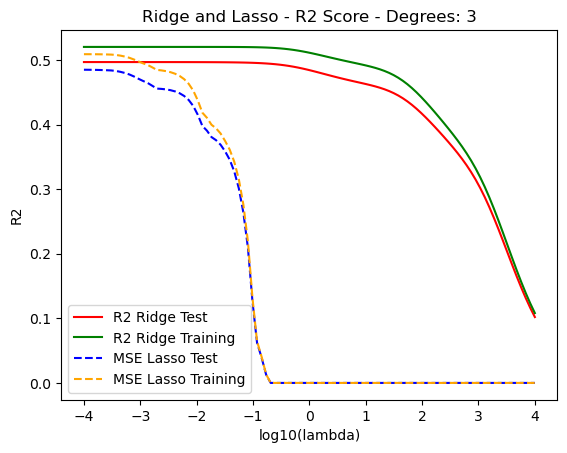

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+03, tolerance: 8.072e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e+02, tolerance: 8.072e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.893e+02, to

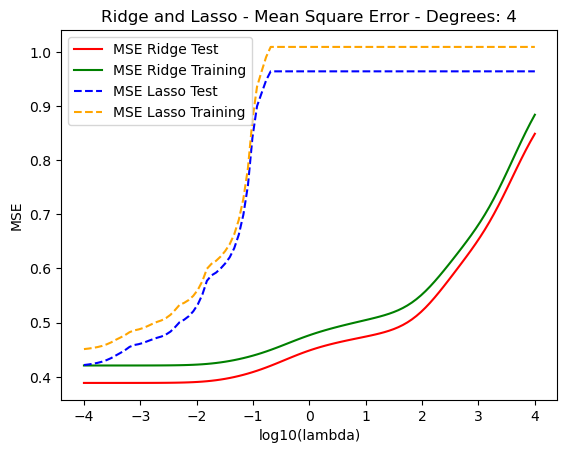

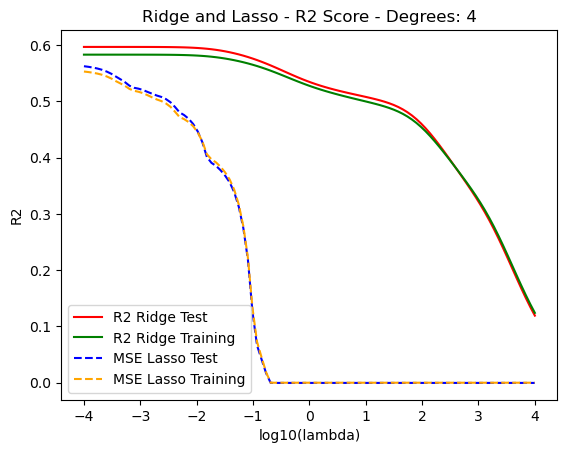

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+03, tolerance: 7.919e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.350e+02, tolerance: 7.919e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.274e+02, to

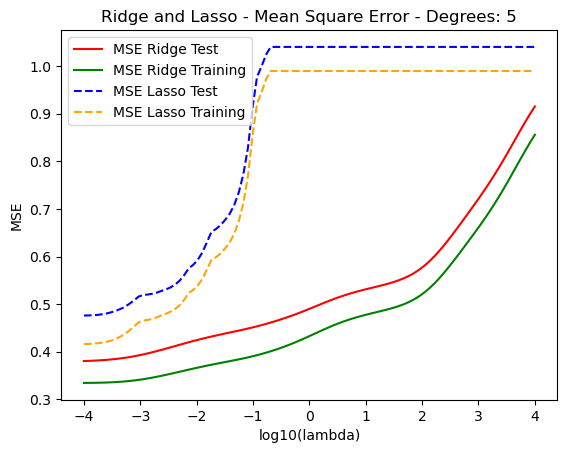

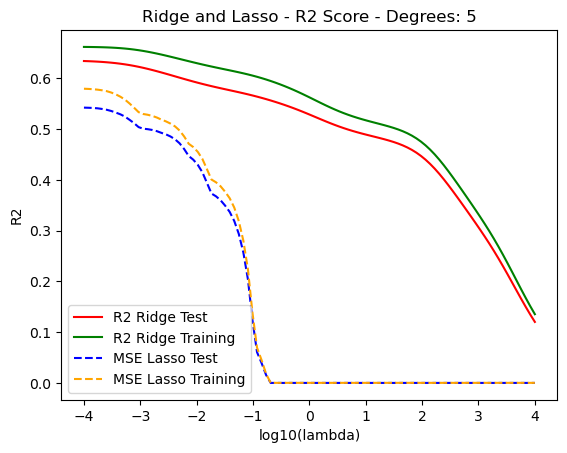

IndexError: range object index out of range

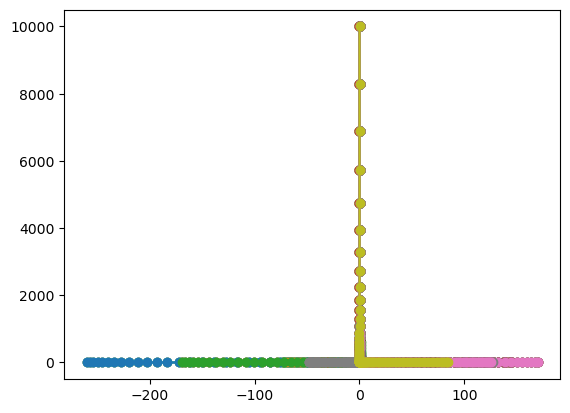

In [36]:
#Polynomials up to 5th order
train_MSEs = []
test_MSEs = []
train_r2s = []
test_r2s = []
betas = []
betas_plot_ridge = []
betas_plot_lasso = []
degrees = range(1,6)
for order in degrees:

    feature_matrix = create_feature_matrix(x, y, order)

    z_scaled = z_scaled.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z_scaled, test_size=0.2)

    #Matrix inversion
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices

    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    #OLS
    training_mse = MSE(z_train, z_tilde)
    test_mse = MSE(z_test, z_predict)

    train_MSEs.append(training_mse)
    test_MSEs.append(test_mse)

    # print(training_mse)
    # print(test_mse)
    # print(f"Max difference in training set: {np.max(np.abs(z_train - z_tilde))}")
    # print(f"Max difference in test set: {np.max(np.abs(z_test - z_predict))}")

    #R2
    r2_training = error.r2_score(z_train, z_tilde)
    r2_test = error.r2_score(z_test, z_predict)
    # print(f"r2 training: {r2_training}")
    # print(f"r2 test: {r2_test}")

    train_r2s.append(r2_training)
    test_r2s.append(r2_test)

    # #For testing - plotting the fitted line over the data points:
    # Simple_test_data.Create_test_plot(order)

    training_ridge_mses = []
    test_ridge_mses = []
    training_ridge_r2s = []
    test_ridge_r2s = []
    betas_ridge = []

    training_lasso_mses = []
    test_lasso_mses = []
    training_lasso_r2s = []
    test_lasso_r2s = []
    betas_lasso = []

    lambda_plot = []
    nlambdas = 100
    lambdas = np.logspace(-4, 4, nlambdas)
    for i in range(nlambdas):
        lmb = lambdas[i]
        lambda_plot.append(lmb)

        #Ridge
        beta_hat_ridge = Beta_ridge_regression(X_train, z_train, lmb)
        betas_ridge.append(beta_hat_ridge)
        z_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
        z_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

        training_ridge_mses.append(error.mean_squared_error(z_train, z_tilde_ridge))
        test_ridge_mses.append(error.mean_squared_error(z_test, z_predict_ridge))

        training_ridge_r2s.append(error.r2_score(z_train, z_tilde_ridge))
        test_ridge_r2s.append(error.r2_score(z_test, z_predict_ridge))

        #Lasso
        RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
        RegLasso.fit(X_train, z_train)
        y_tilde_lasso = RegLasso.predict(X_train)
        y_predict_lasso = RegLasso.predict(X_test)

        training_lasso_mses.append(error.mean_squared_error(z_train, y_tilde_lasso))
        test_lasso_mses.append(error.mean_squared_error(z_test, y_predict_lasso))

        training_lasso_r2s.append(error.r2_score(z_train, y_tilde_lasso))
        test_lasso_r2s.append(error.r2_score(z_test, y_predict_lasso))
        #betas_lasso.append(beta)

    betas_plot_ridge.append(betas_ridge)
    #betas_plot_lasso.append(betas_lasso)

    # MSE plots
    plt.figure()
    plt.title("Ridge and Lasso - Mean Square Error - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

    #TODO: Easier to read with same colour for the test and training, or not?
    plt.plot(np.log10(lambdas), test_lasso_mses, 'b--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_mses, '--', color='orange', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # R2 Ridge plots
    plt.figure()
    plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

    plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('R2')
    plt.legend()
    plt.show()


# #From ChatGPT:
#Plot beta vs degrees
for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')

for i in degrees:
    plt.plot(betas_ridge, lambda_plot, marker='o', label=f'Degree {degrees[i]}')

# Adding plot details
plt.title('Beta Coefficients as a Function of Polynomial Degree')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()





# e) Bootstrap

Polynomial degree: 0
Error: 0.08234655468994571
Bias^2: 0.08208442496008674
Var: 0.0002621297298589818
0.08234655468994571 >= 0.08208442496008674 + 0.0002621297298589818 = 0.08234655468994571

Polynomial degree: 1
Error: 0.02695928306892479
Bias^2: 0.02672893126724877
Var: 0.00023035180167601496
0.02695928306892479 >= 0.02672893126724877 + 0.00023035180167601496 = 0.026959283068924783

Polynomial degree: 2
Error: 0.00480954337734332
Bias^2: 0.00458133265216573
Var: 0.00022821072517758894
0.00480954337734332 >= 0.00458133265216573 + 0.00022821072517758894 = 0.004809543377343319

Polynomial degree: 3
Error: 0.0005108939753543072
Bias^2: 0.00018952162867481777
Var: 0.00032137234667948937
0.0005108939753543072 >= 0.00018952162867481777 + 0.00032137234667948937 = 0.0005108939753543072

Polynomial degree: 4
Error: 0.05479728690263006
Bias^2: 0.0021814678942982256
Var: 0.05261581900833183
0.05479728690263006 >= 0.0021814678942982256 + 0.05261581900833183 = 0.054797286902630055



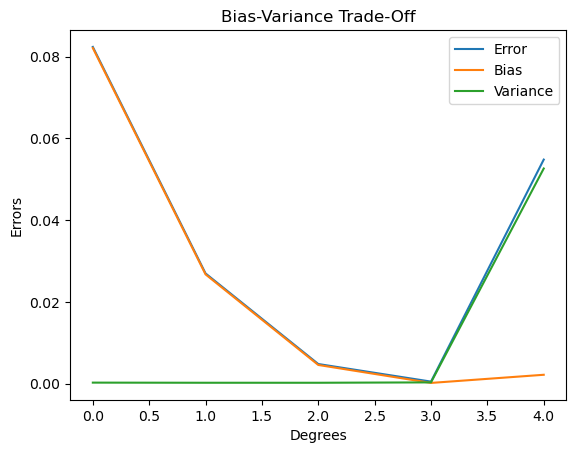

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample



n = 500
n_bootstraps = 50
noise = 0.1
max_degrees = 5

errors = np.zeros(max_degrees)
biases = np.zeros(max_degrees)
variances = np.zeros(max_degrees)
polydegrees = np.zeros(max_degrees)
for degree in range(max_degrees):
    feature_matrix = create_feature_matrix(x, y, degree)

    z = z.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices

    #From lecture notes
    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    # Combine x transformation and model into one operation.
    # Not necessary, but convenient.
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

    # The following (m x n_bootstraps) matrix holds the column vectors z_pred
    # for each bootstrap iteration.
    z_pred = np.empty((z_test.shape[0], n_bootstraps))  # Adjust for 3D case

    # Perform bootstrapping
    for i in range(n_bootstraps):
        # Resample the training data
        X_resampled, z_resampled = resample(X_train, z_train)
        model.fit(X_resampled, z_resampled)
        # Fit the model on resampled data and evaluate on the same test data
        z_pred[:, i] = model.fit(X_resampled, z_resampled).predict(X_test).ravel()  # Prediction in 3D

    # Reshape z_test to match the dimensions of z_pred for broadcasting
    z_test_reshaped = z_test.reshape(-1, 1)  # Reshape to (80, 1)

    polydegrees[degree] = degree
    # Error calculation (mean squared error across all bootstrap samples and test points)
    error = np.mean(np.mean((z_test_reshaped - z_pred)**2, axis=1, keepdims=True))
    errors[degree] = error
    # Bias^2 calculation (bias as the difference between true values and the mean prediction)
    bias = np.mean((z_test_reshaped - np.mean(z_pred, axis=1, keepdims=True))**2)
    biases[degree] = bias
    # Variance calculation (variance of predictions across bootstrap samples)
    variance = np.mean(np.var(z_pred, axis=1,keepdims=True))
    variances[degree] = variance

    # Note: Expectations and variances taken w.r.t. different training
    # data sets, hence the axis=1. Subsequent means are taken across the test data
    # set in order to obtain a total value, but before this we have error/bias/variance
    # calculated per data point in the test set.
    # Note 2: The use of keepdims=True is important in the calculation of bias as this 
    # maintains the column vector form. Dropping this yields very unexpected results.
    # error = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    # bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    # variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error)
    print('Bias^2:', bias)
    print('Var:', variance)
    print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))
    print()

plt.plot(polydegrees, errors, label='Error')
plt.plot(polydegrees, biases, label='Bias')
plt.plot(polydegrees, variances, label='Variance')
plt.title('Bias-Variance Trade-Off')
plt.xlabel('Degrees')
plt.ylabel('Errors')
plt.legend()
plt.show()

Error: 30989.51113648287
Bias^2: 30989.388107746378
Var: 0.12302873647825188
30989.51113648287 >= 30989.388107746378 + 0.12302873647825188 = 30989.511136482855


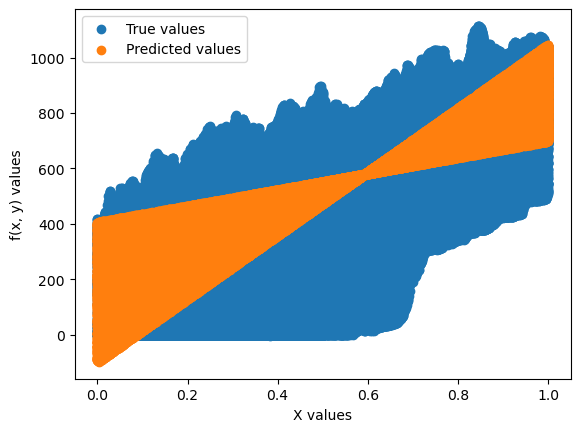

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18
noise = 0.1

# Create two-dimensional data set (x, y).
# x = np.linspace(-1, 3, n)
# y = np.linspace(-1, 3, n)
# X = np.vstack((x, y)).T  # Combine x and y into a 2D feature matrix.

# z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
#     + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
#     + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
#     - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2))) + np.random.normal(0, 0.1, x.shape)

# The target function f(x, y) can be a function of both x and y
#z = np.exp(-x**2) + 1.5 * np.exp(-(y-2)**2) + np.random.normal(0, 0.1, x.shape)

terrain = imread('SRTM_data_Norway_2.tif')

N = 1000
m = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])

x, y = np.meshgrid(x, y)
X = np.vstack((x.ravel(), y.ravel())).T

#X = np.vstack((x, y)).T 
z = terrain.ravel()

# Split into train and test sets
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
#poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
#X_poly = poly.fit_transform(X)
# Combine polynomial transformation and linear regression model
model = make_pipeline(PolynomialFeatures(degree=degree, interaction_only=True), LinearRegression(fit_intercept=False))

# The following (m x n_boostraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
z_pred = np.empty((z_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    X_, z_ = resample(X_train, z_train)

    # Evaluate the new model on the same test data each time.
    z_pred[:, i] = model.fit(X_, z_).predict(X_test).ravel()

# Calculate error (mean squared error for each point)
error = np.mean(np.mean((z_test.reshape(-1, 1) - z_pred)**2, axis=1))

# Calculate bias^2 (squared difference between true values and the mean prediction)
bias = np.mean((z_test.reshape(-1, 1) - np.mean(z_pred, axis=1, keepdims=True))**2)

# Calculate variance (variance of predictions for each test point)
variance = np.mean(np.var(z_pred, axis=1))

# Calculate error, bias^2, and variance
#error = np.mean(np.mean((z_test - z_pred)**2, axis=1, keepdims=True))
#bias = np.mean((z_test - np.mean(z_pred, axis=1, keepdims=True))**2)
#variance = np.mean(np.var(z_pred, axis=1, keepdims=True))
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

# Visualization
plt.scatter(X_test[:, 0], z_test, label='True values')  # Plot test points
plt.scatter(X_test[:, 0], np.mean(z_pred, axis=1), label='Predicted values')
plt.xlabel('X values')
plt.ylabel('f(x, y) values')
plt.legend()
plt.show()





# f) k-fold

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.776e+00, tolerance: 8.736e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+00, tolerance: 8.736e-01
  model = cd_fast.enet_coordinate_descent(


k = 5


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+01, tolerance: 9.132e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.127e+01, tolerance: 8.307e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.601e+00, to

k = 6


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.818e+00, tolerance: 8.547e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+01, tolerance: 8.954e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.084e+00, to

k = 7


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.692e+00, tolerance: 8.569e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.606e+00, tolerance: 8.902e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.561e+00, to

k = 8


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.525e-01, tolerance: 8.352e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.854e+00, tolerance: 8.665e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+00, to

k = 9


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.068e+00, tolerance: 8.745e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.784e+00, tolerance: 9.216e-01
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+01, to

k = 10


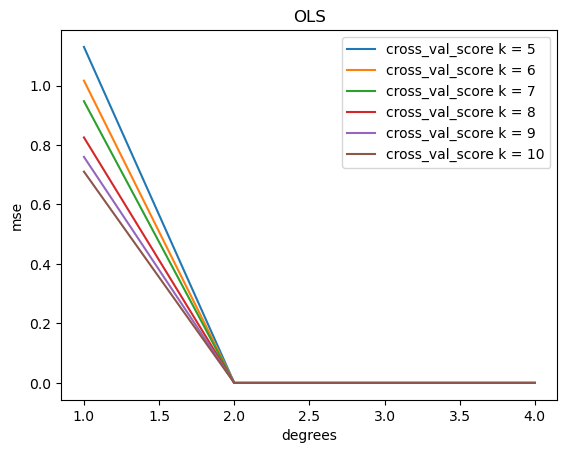

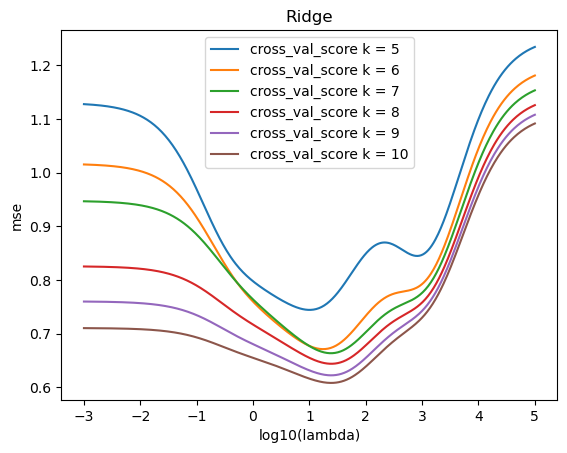

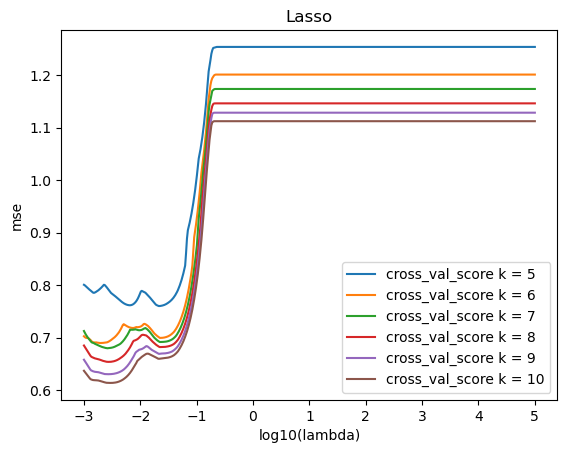

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


k_folds = range(5,11)
degrees = range(1,5)

degree = 3

ols_k_mses = []
ridge_k_mses = []
lasso_k_mses = []
i = 0
for k in k_folds:
    kfold = KFold(n_splits = k)
    
    #OLS
    estimated_mse_ols = np.zeros(len(degrees))
    j = 0
    #for degree in degrees:
        # Decide degree on polynomial to fit
    poly = PolynomialFeatures(degree = degree)

    X = create_feature_matrix(x, y, degree)

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    ols = LinearRegression()
    estimated_mse_folds = cross_val_score(ols, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_ols[j] = np.mean(-estimated_mse_folds)

    j += 1

    ols_k_mses.append(estimated_mse_ols)

    #Ridge and Lasso
    # Decide which values of lambda to use
    nlambdas = 500
    lambdas = np.logspace(-3, 5, nlambdas)
    #From lecture notes:
    ## Cross-validation using cross_val_score from sklearn along with KFold
    estimated_mse_ridge = np.zeros(nlambdas)
    estimated_mse_lasso = np.zeros(nlambdas)
    j = 0
    for lmb in lambdas:
        ridge = Ridge(alpha = lmb)
        lasso = Lasso(alpha = lmb)

        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_folds = cross_val_score(ridge, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_ridge[j] = np.mean(-estimated_mse_folds)

        estimated_mse_folds = cross_val_score(lasso, X, z[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_lasso[j] = np.mean(-estimated_mse_folds)

        j += 1

    i += 1
    print(f"k = {k}")
    ridge_k_mses.append(estimated_mse_ridge)
    lasso_k_mses.append(estimated_mse_lasso)


## Plots
#OLS
plt.figure()
i = 0
for estimate in ols_k_mses:
    plt.plot(degrees, estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('degrees')
plt.ylabel('mse')
plt.legend()
plt.title("OLS")

plt.show()

#Ridge
plt.figure()
i = 0
for estimate in ridge_k_mses:
    plt.plot(np.log10(lambdas), estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('log10(lambda)')
plt.ylabel('mse')
plt.legend()
plt.title("Ridge")

plt.show()

#Lasso
plt.figure()
i = 0
for estimate in lasso_k_mses:
    plt.plot(np.log10(lambdas), estimate, label = f"cross_val_score k = {k_folds[i]}")
    i += 1
plt.xlabel('log10(lambda)')
plt.ylabel('mse')
plt.legend()
plt.title("Lasso")

plt.show()



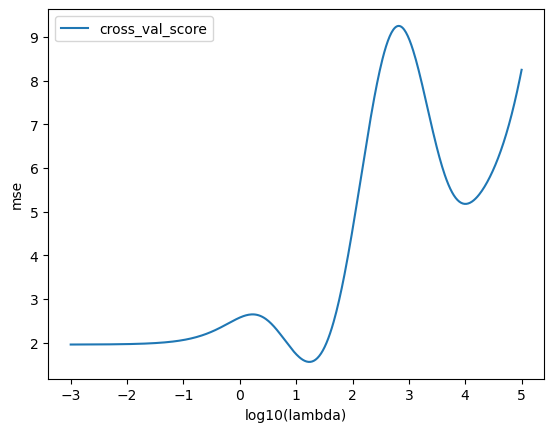

In [1]:
#From lecture notes:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)


## Cross-validation using cross_val_score from sklearn along with KFold

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation
plt.figure()
plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.xlabel('log10(lambda)')
plt.ylabel('mse')
plt.legend()

plt.show()

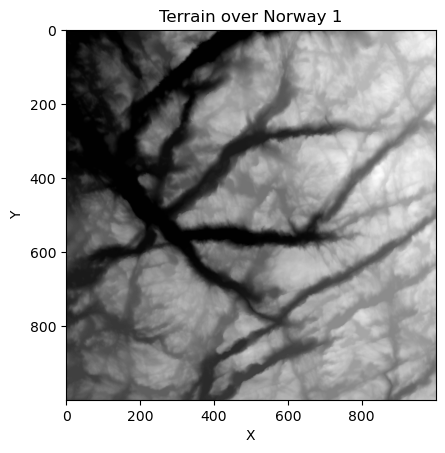

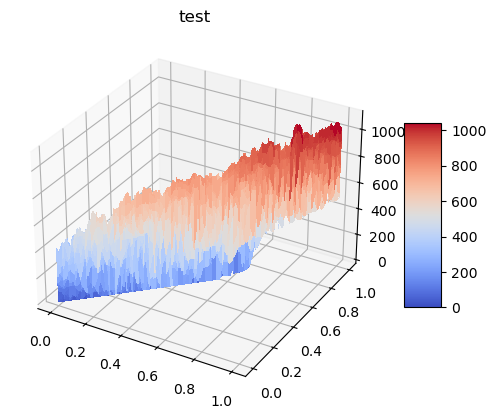

In [27]:
# Load the terrain - again from project description
terrain = imread('SRTM_data_Norway_2.tif')

N = 1000
m = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
#X = create_X(x_mesh, y_mesh,m)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
